In [1]:
#import submodules

from General_modules.dataset import Dataset
from LightGBM_modules.LightGBM import LightGBM
from Conv_AE_modules.Conv_AE_main import Conv_AE_Main
from MLflow.mlflow import MLflow
import os

In [2]:
# Create dataset
dataset = Dataset('./SKAB')
dataset.split_data()
dataset.standard_data()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


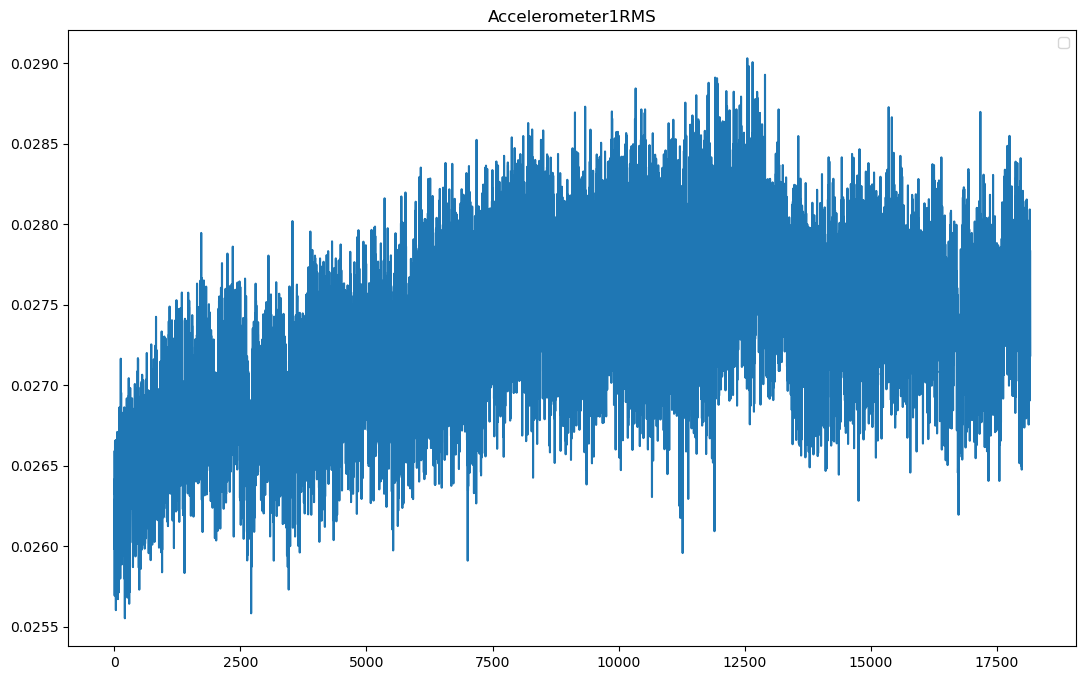

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


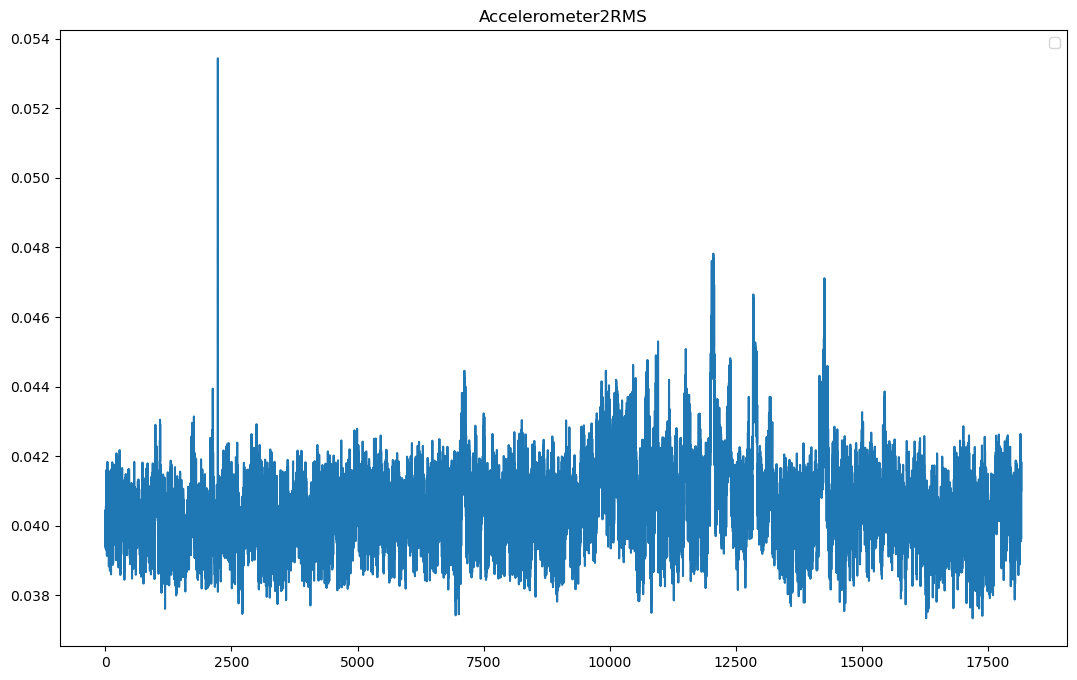

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


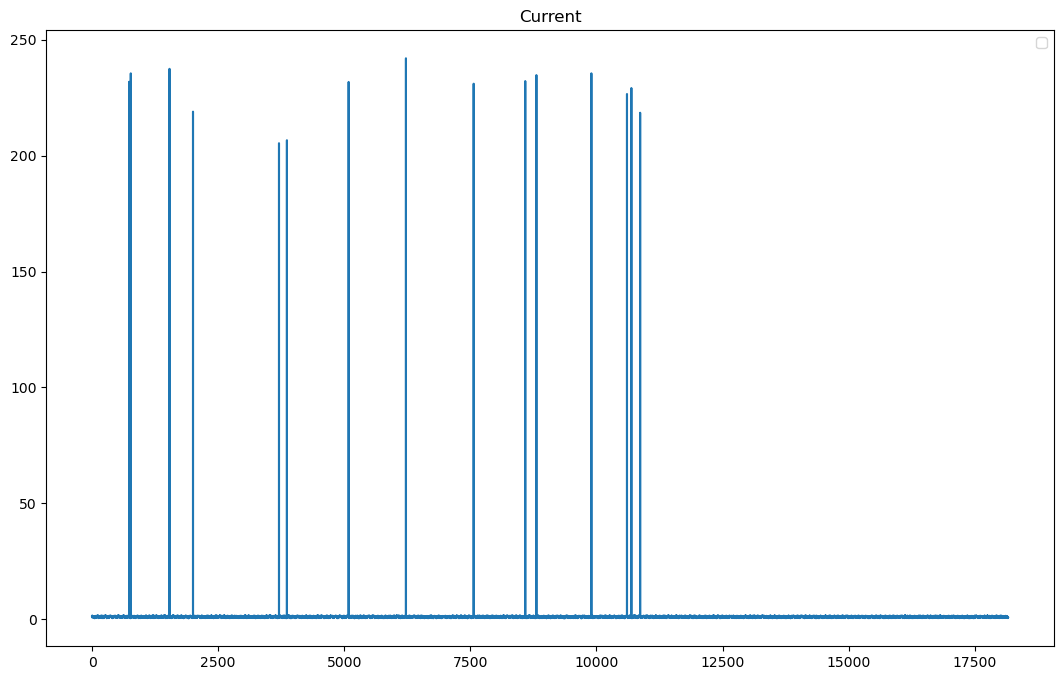

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


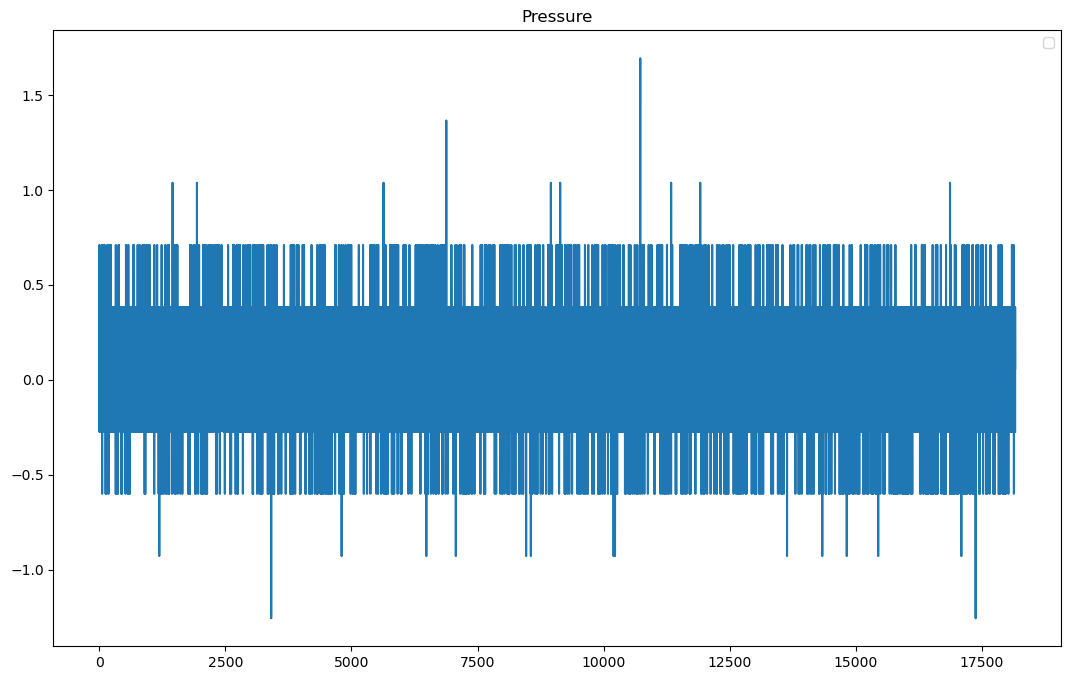

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


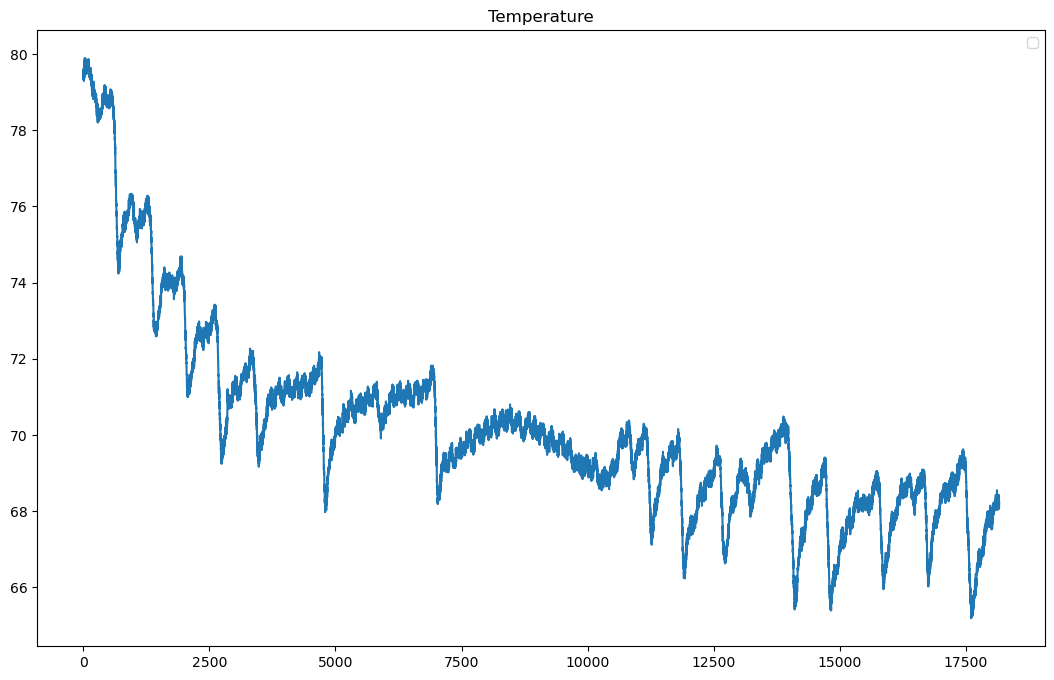

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


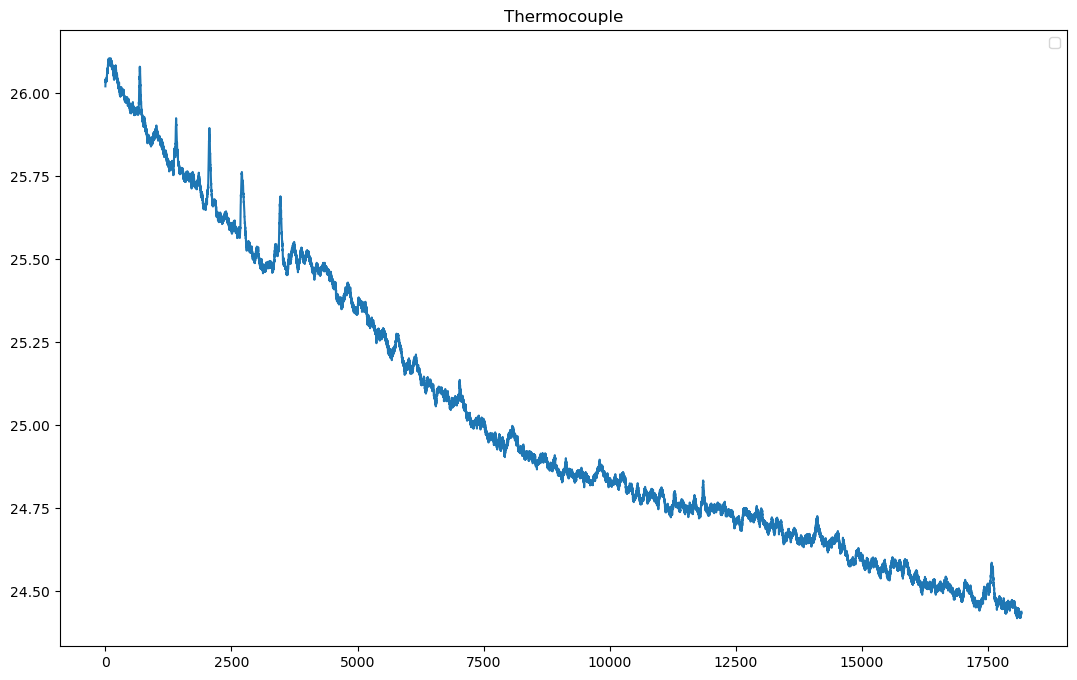

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


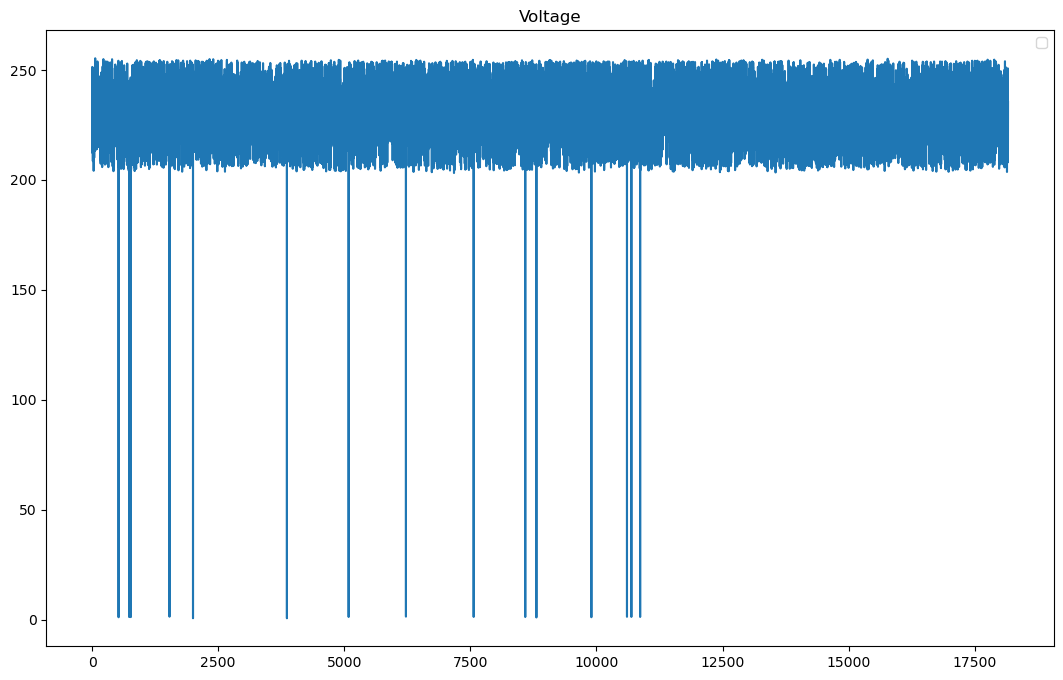

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


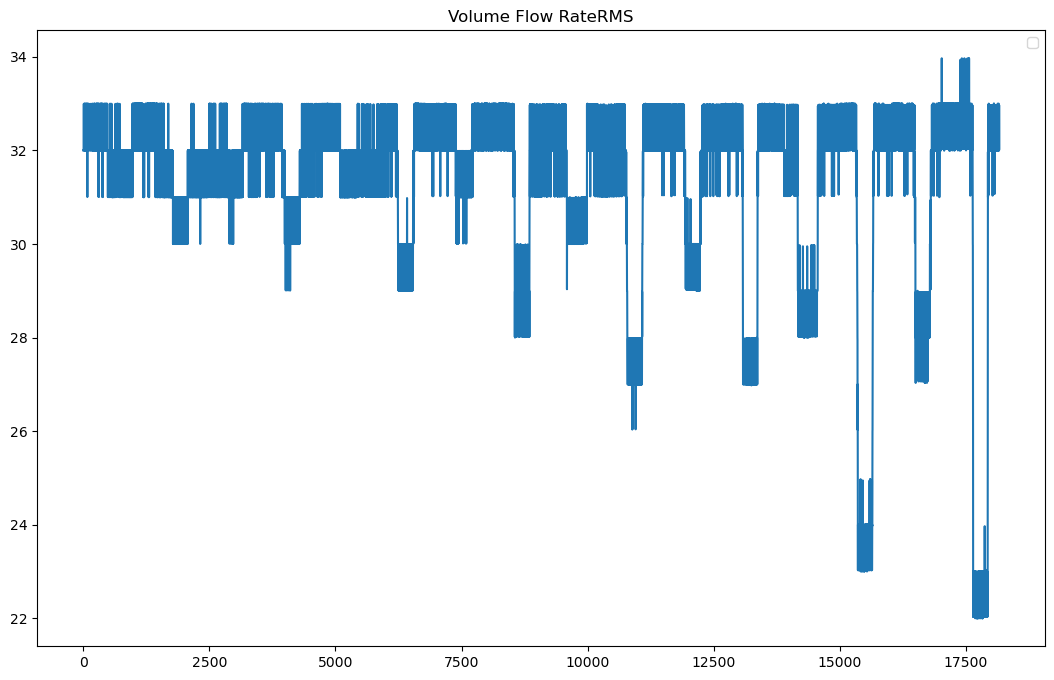

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


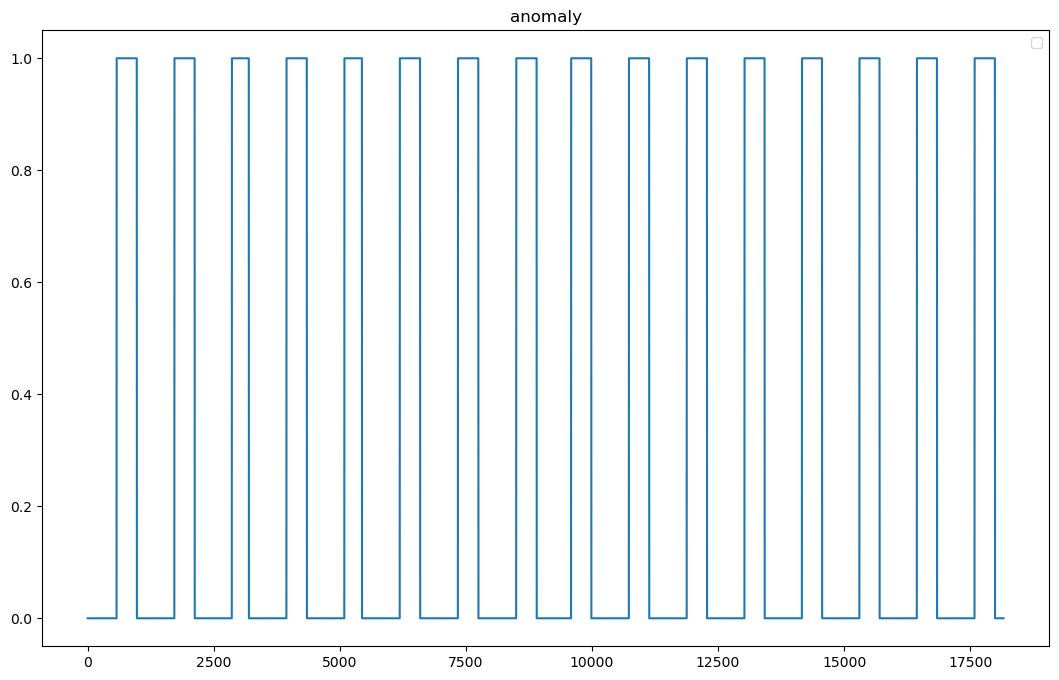

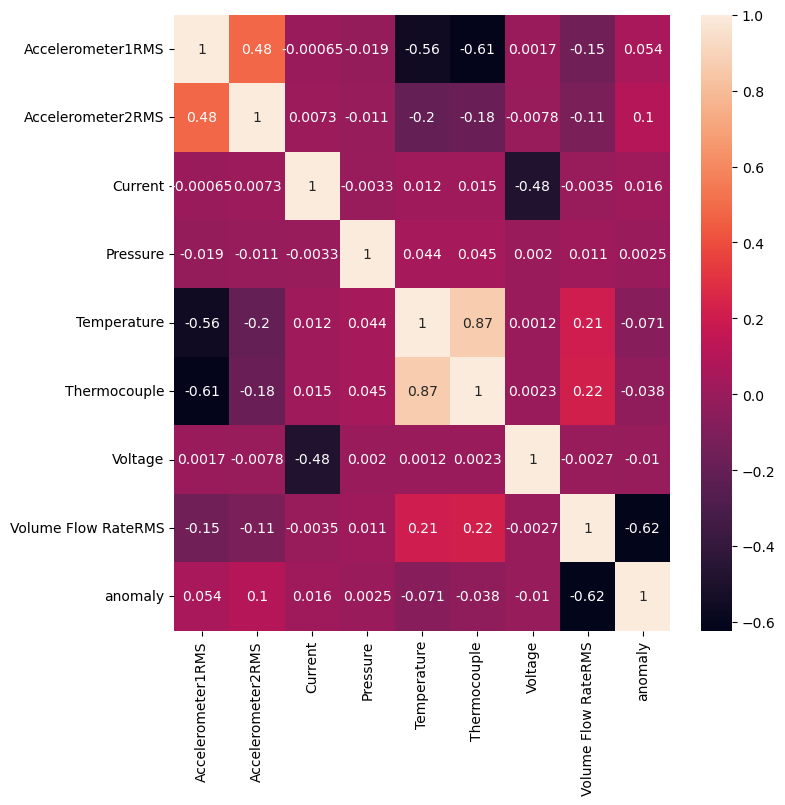

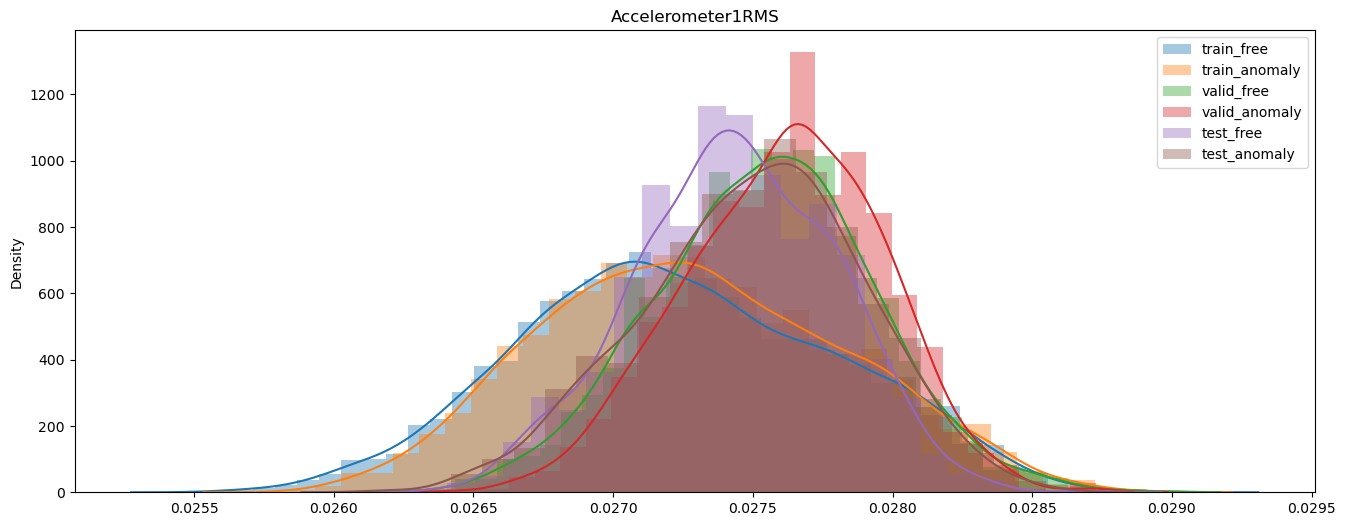

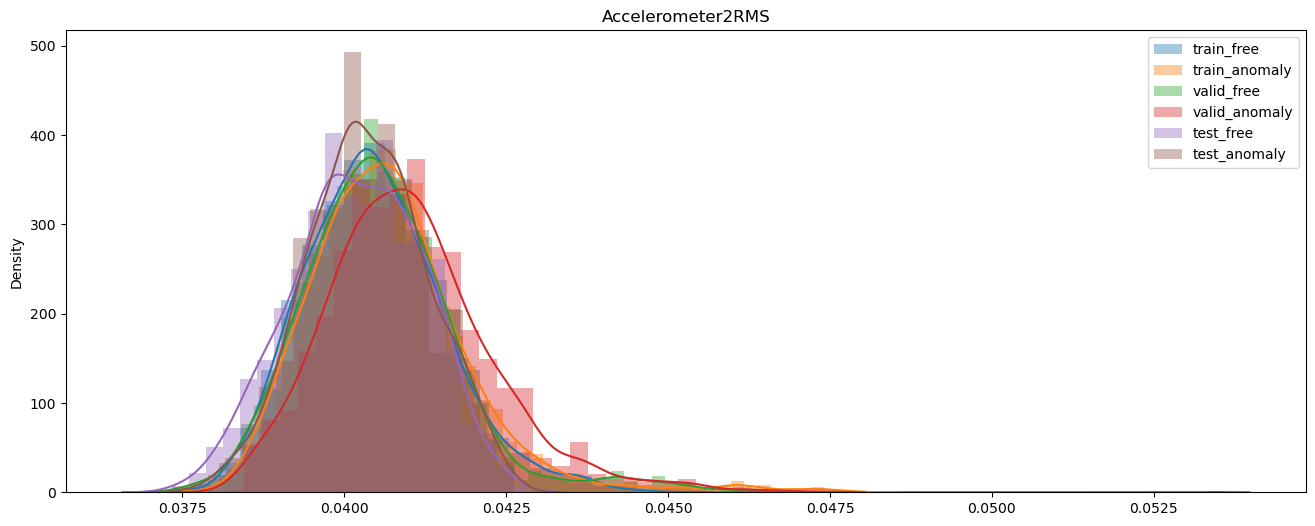

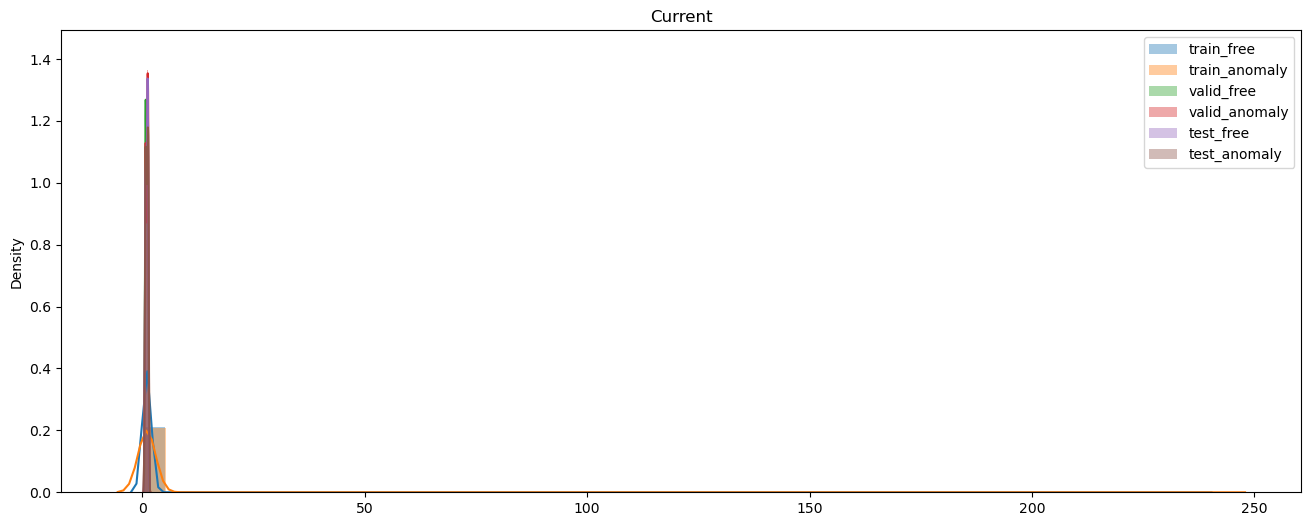

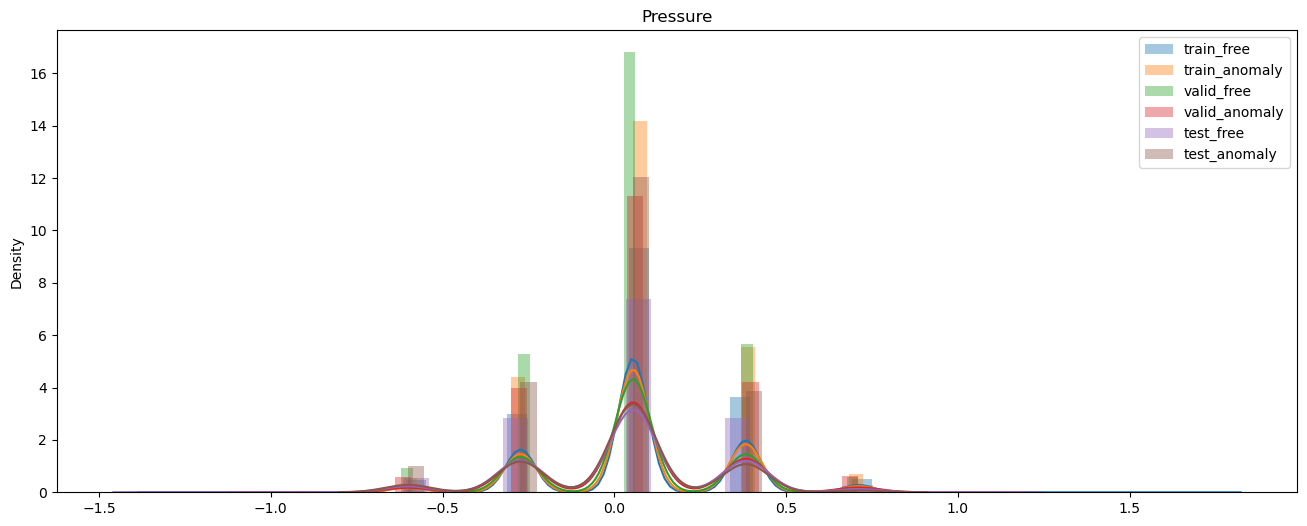

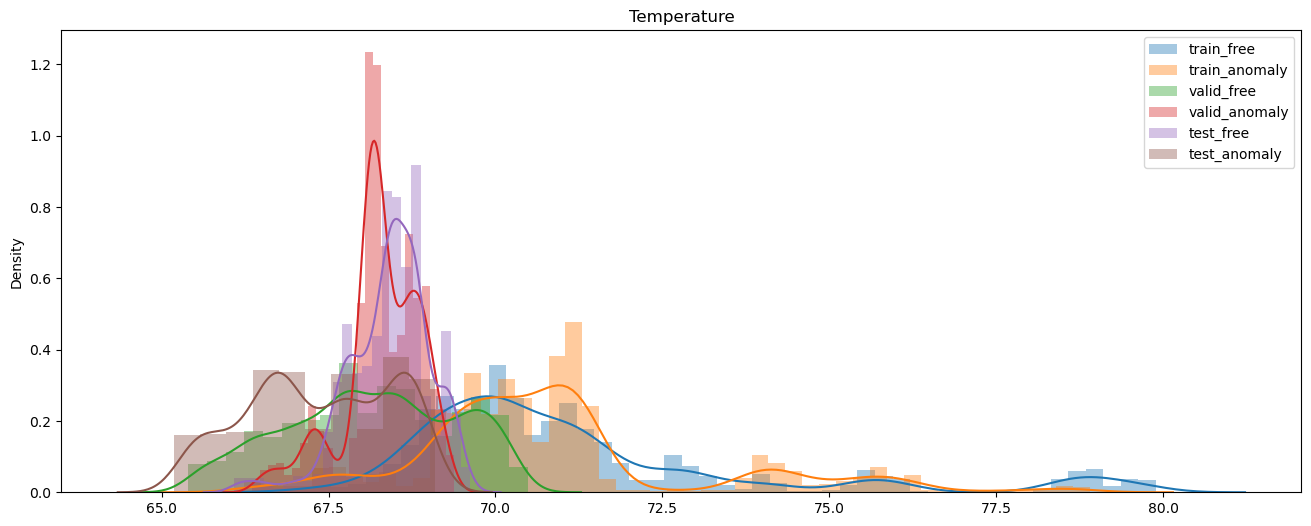

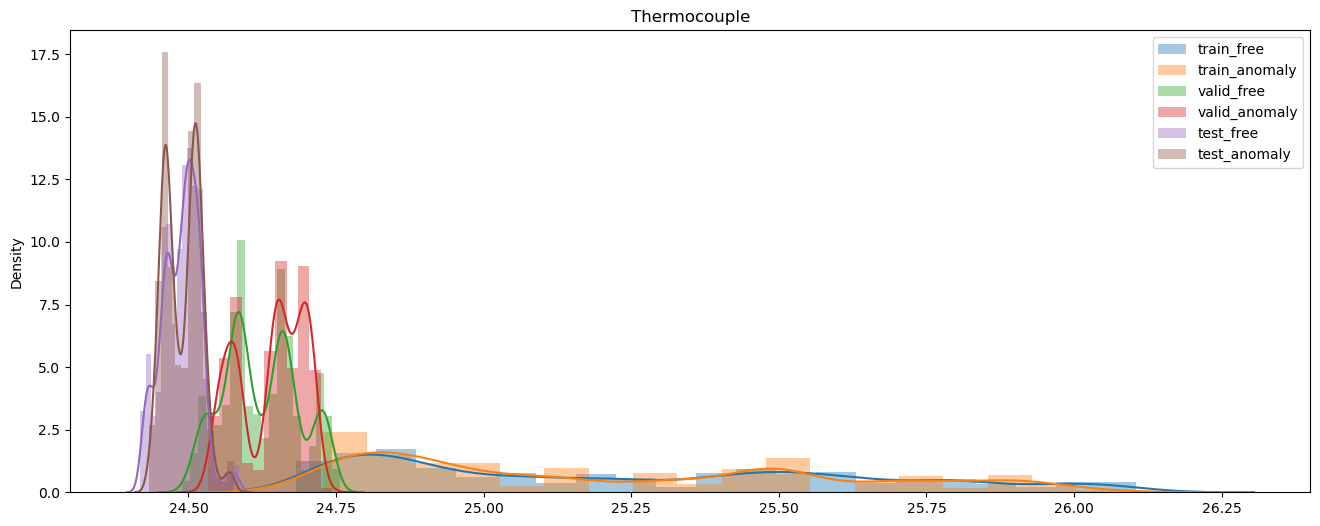

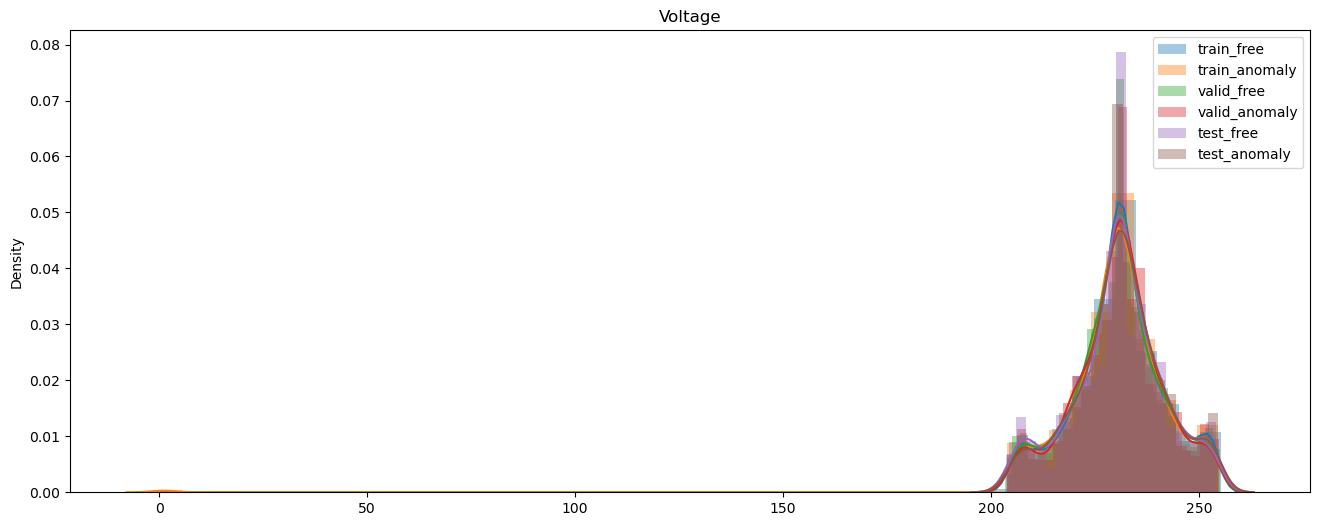

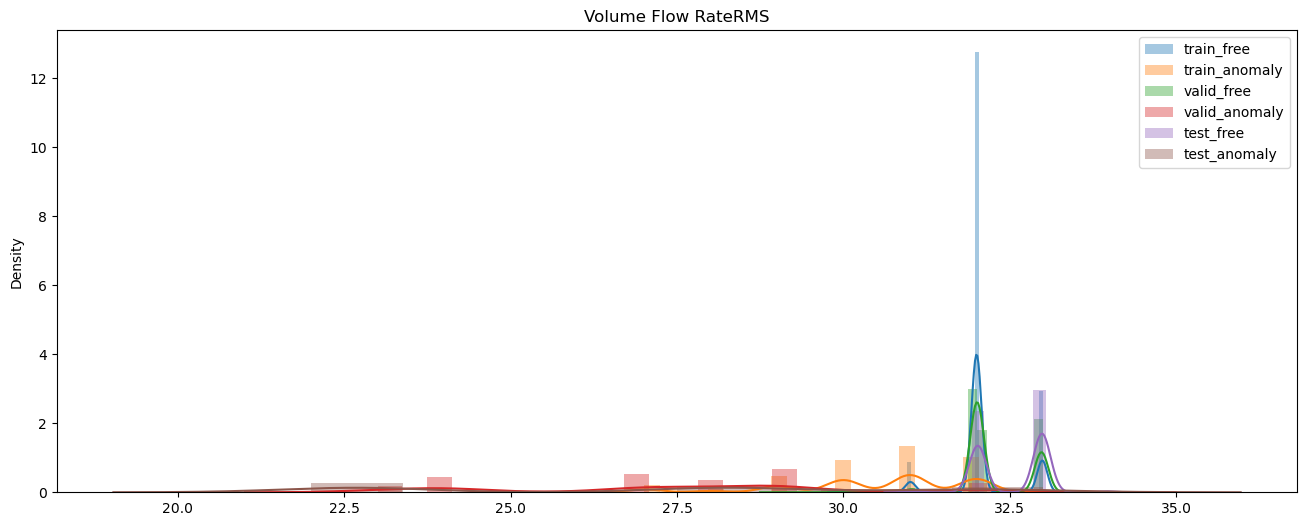

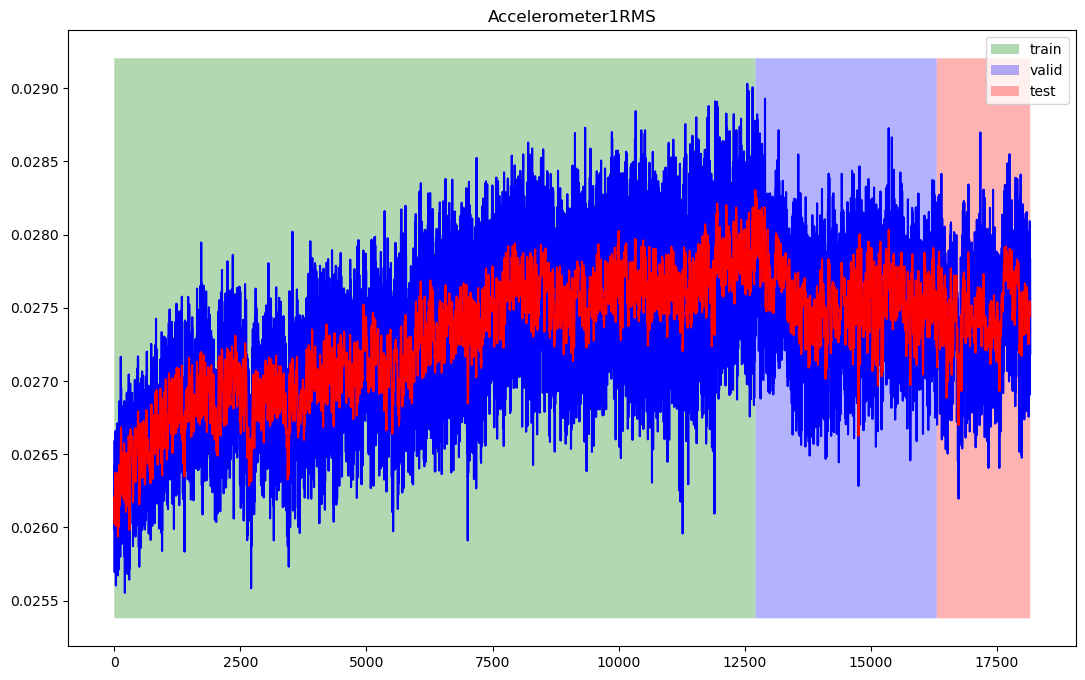

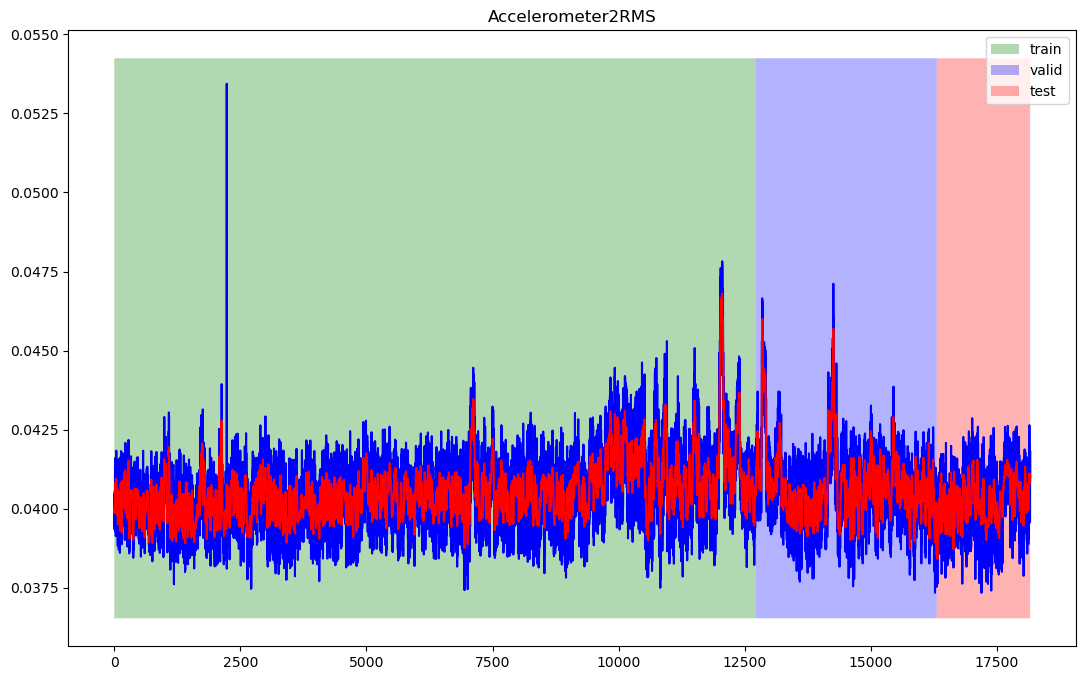

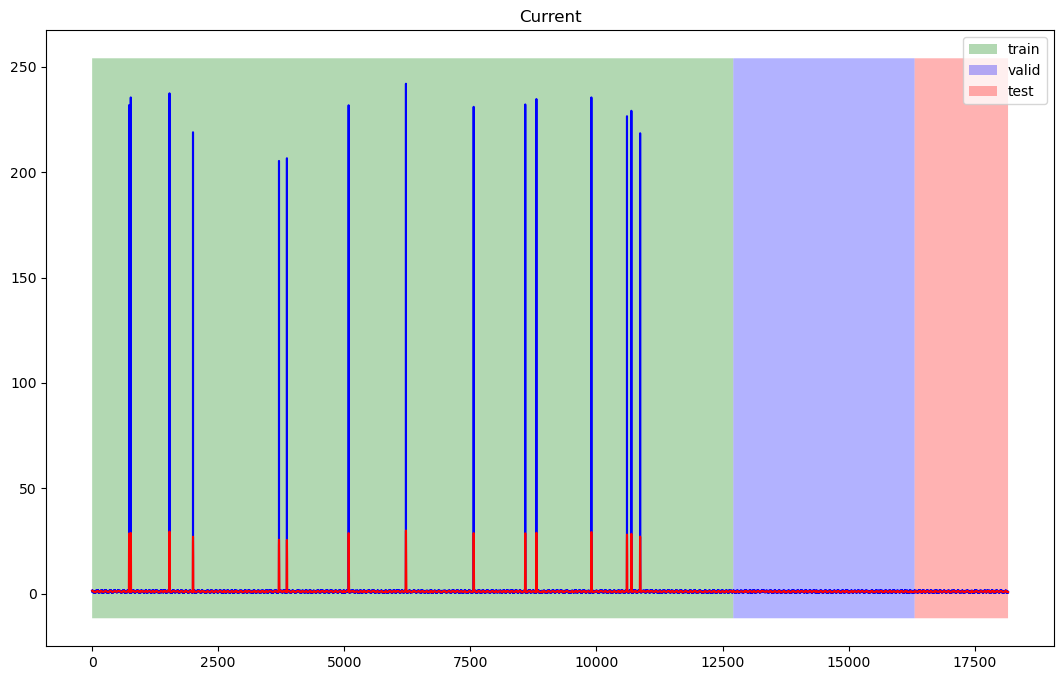

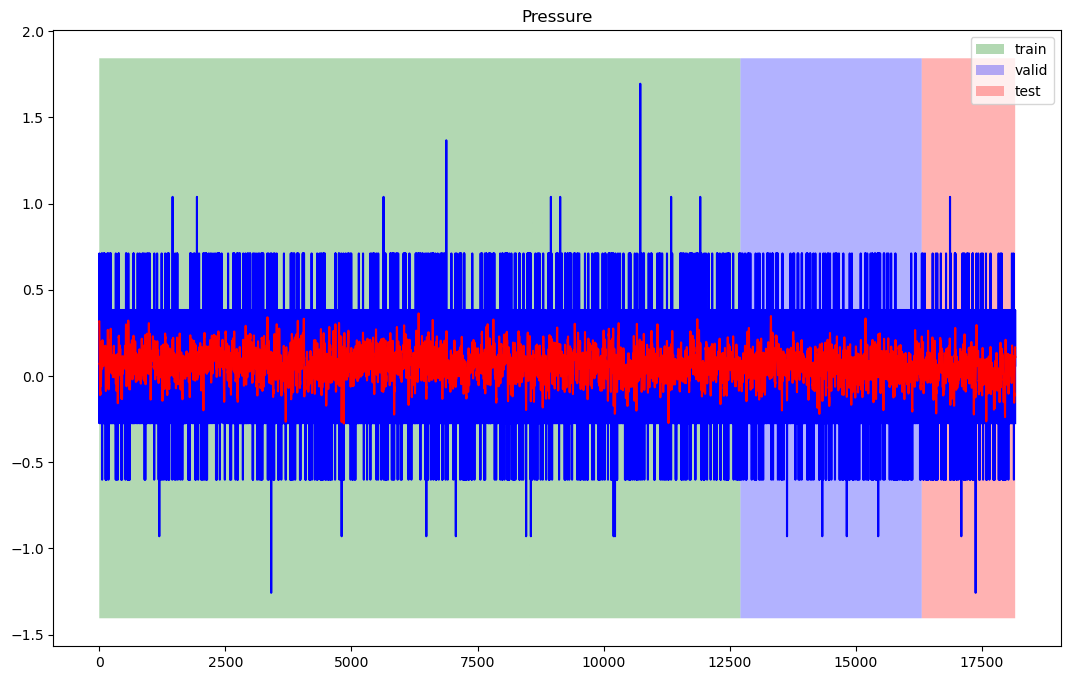

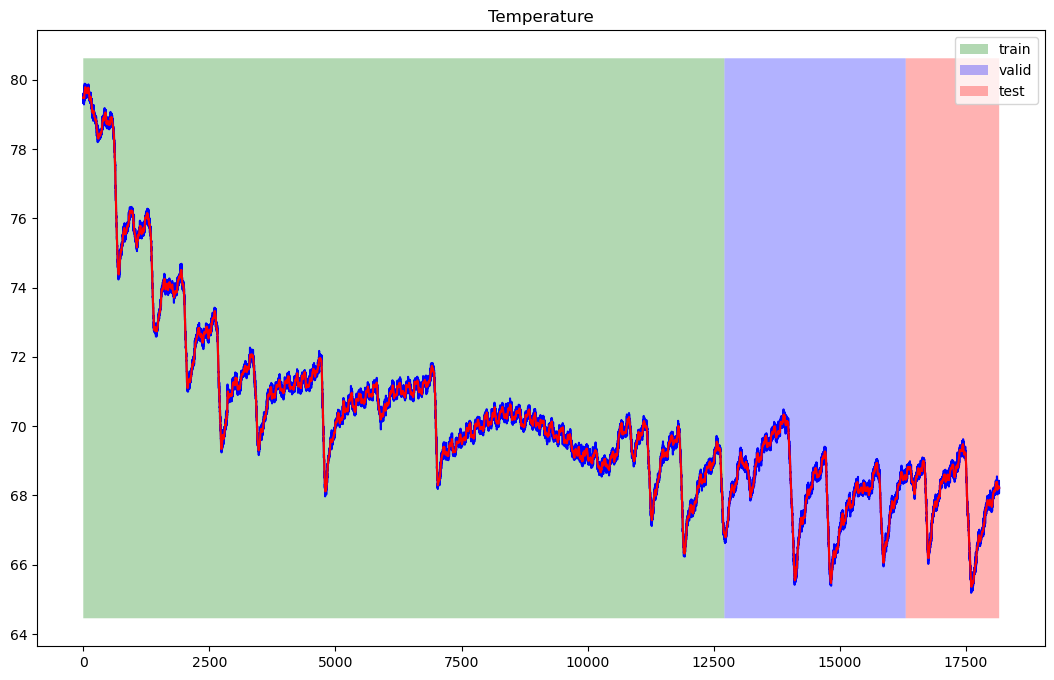

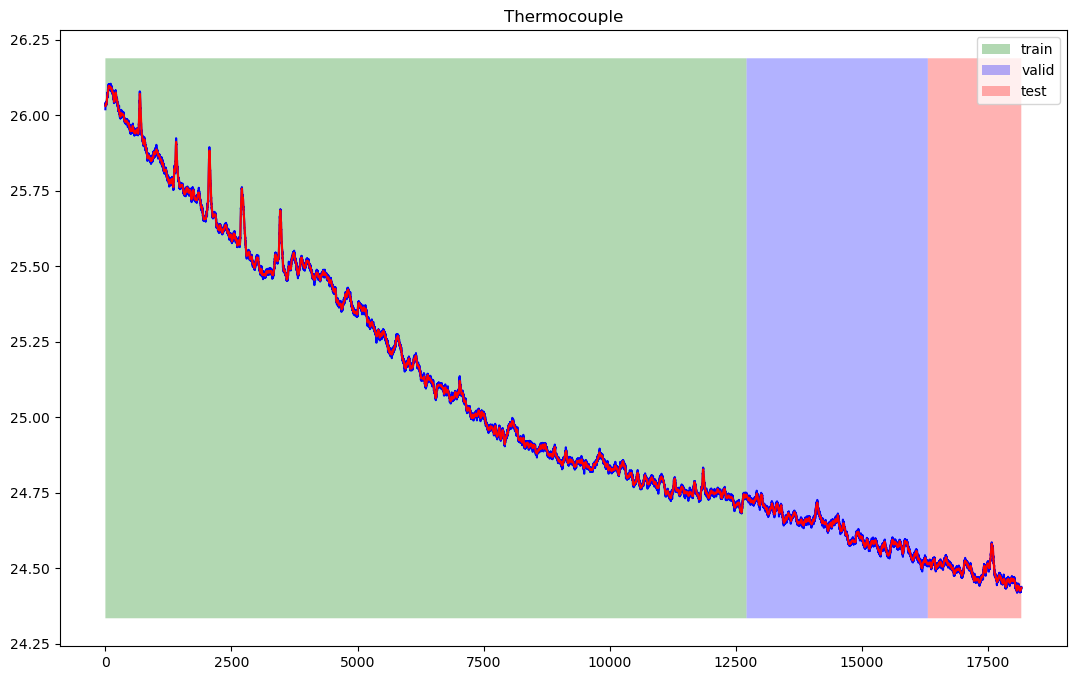

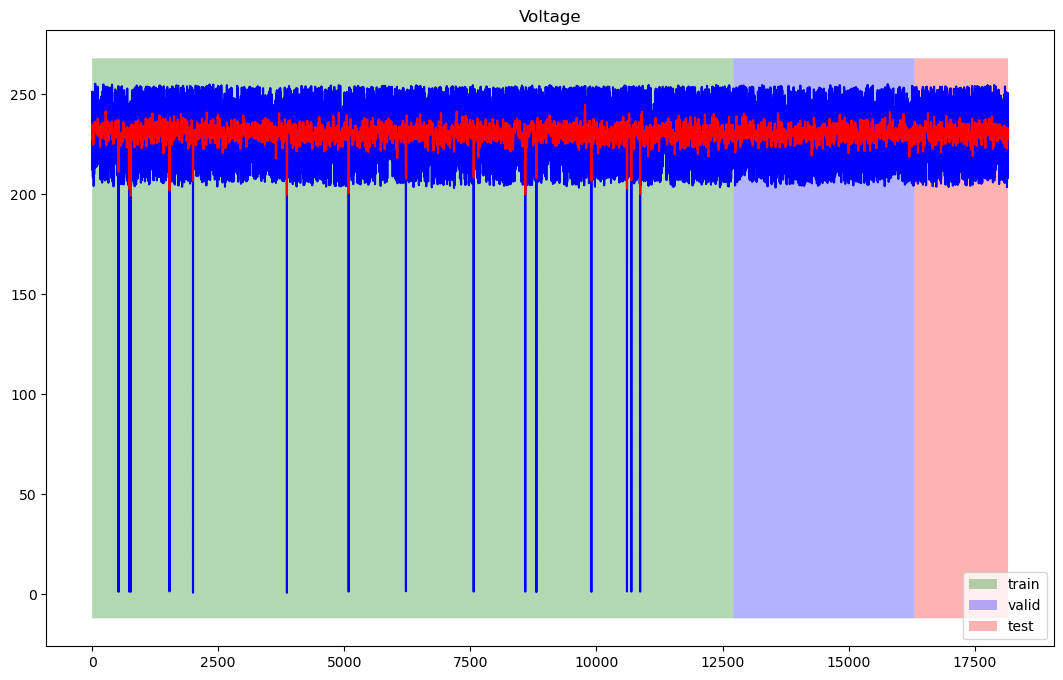

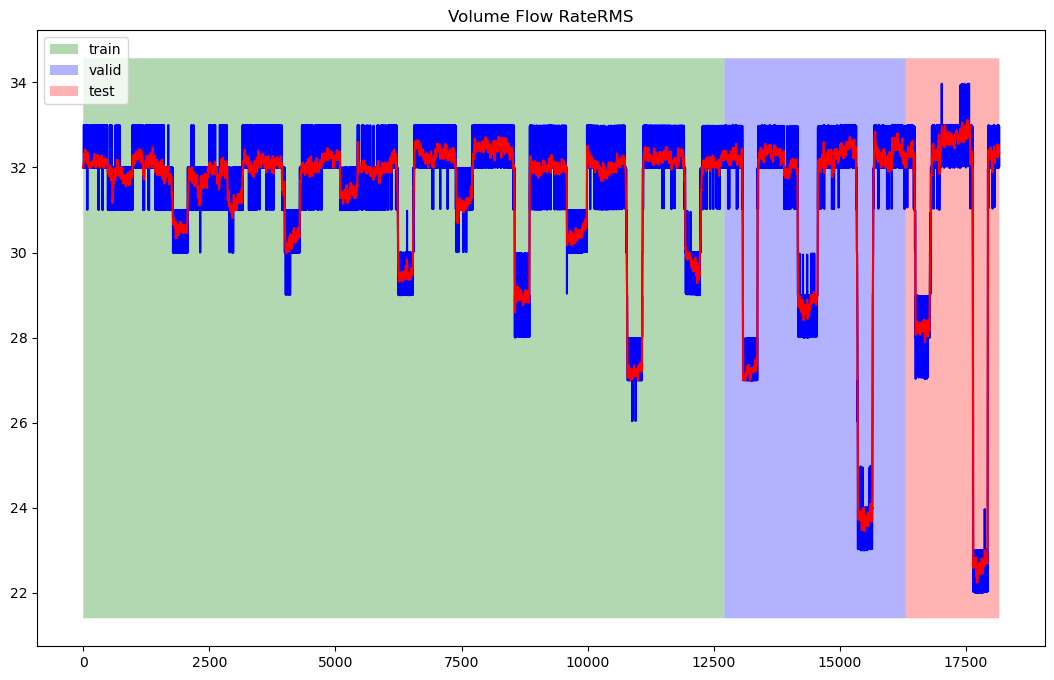

In [3]:
# Show data results
dataset.show_plt_data()
dataset.show_heatmap_data()
dataset.show_plt_free_anomaly()
dataset.show_smooth_data()

[LightGBM] [Info] Number of positive: 4309, number of negative: 8395
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 12704, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.339185 -> initscore=-0.666930
[LightGBM] [Info] Start training from score -0.666930
optimization1
train acc:0.9861460957178841valid acc:0.9567884025648173 | lr:0.04430375245218265, min_data_in_leaf:1,max_depth:6,num_leaves:23
[LightGBM] [Info] Number of positive: 4309, number of negative: 8395
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 12704, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.339185 -> initscore=-0.666930
[LightGBM] [Info] Start training from score -0.666930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

array([[1041,    0],
       [ 137,  666]])

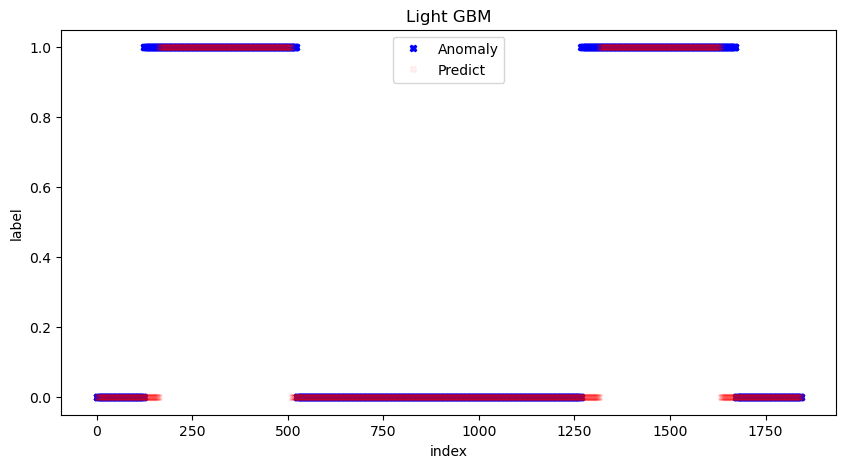

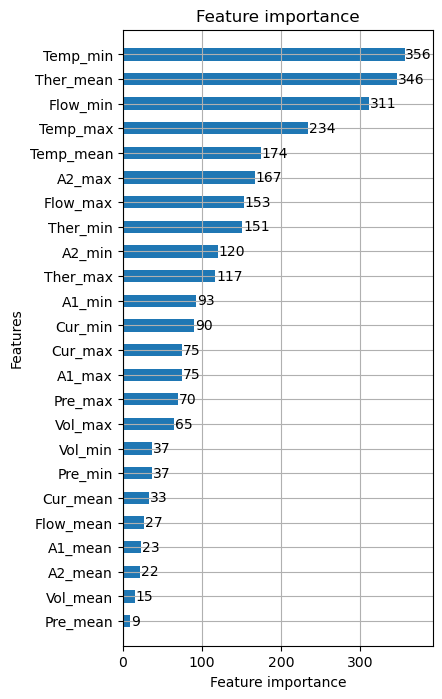

In [4]:
# Train and test using LightGBM module
lightgbm = LightGBM(dataset)
lightgbm.train()
lightgbm.hyperparams_optimization_results()
test_acc,test_f1score,test_recallscore,test_cm,test_pred,params,model = lightgbm.test()

In [5]:
# Save results to MLFLow
os.environ["MLFLOW_TRACKING_USERNAME"] = "stavco9@gmail.com"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "********"
mlflow_client = MLflow('https://dbc-c3108cf4-06da.cloud.databricks.com/')
mlflow_client.run_experiment(experiment_name="/Users/stavco9@gmail.com/SKABLightGBM", test_acc=test_acc,
                             test_f1score=test_f1score, test_recallscore=test_recallscore, test_cm=test_cm, test_pred=test_pred,
                             params=params, model=model, model_name="lightgbm-model" ,train_x=lightgbm.train_x)
mlflow_client.show_experiment_results(test_x=lightgbm.test_x, test_y=lightgbm.test_y, features=lightgbm.features,
                                      start_index=0, end_index=50)

Experiment id is 3306339047703331
dbfs:/databricks/mlflow-tracking/3306339047703331/57c57b7ed76846a0b7ef7991ffab21ee/artifacts


Uploading artifacts:   0%|          | 0/6 [00:00<?, ?it/s]

Registered model 'lightgbm-model' already exists. Creating a new version of this model...
2024/02/03 14:49:24 INFO mlflow.store.model_registry.abstract_store: Waiting up to 60 seconds for model version to finish creation. Model name: lightgbm-model, version 7
Created version '7' of model 'lightgbm-model'.


     A1_mean    A1_min    A1_max   A2_mean    A2_min    A2_max  Cur_mean  \
0   0.051986 -0.378105  0.575524 -1.361966 -2.128987 -0.809890 -0.076110   
1  -0.029820 -0.378105  0.497272 -1.512456 -2.314790 -0.855468 -0.078517   
2  -0.093704 -0.378105  0.398144 -1.666669 -2.397596 -0.957867 -0.081201   
3  -0.131416 -0.378105  0.268243 -1.809287 -2.397596 -1.086616 -0.082911   
4  -0.148822 -0.378105  0.094186 -1.937679 -2.397596 -1.237666 -0.083224   
5  -0.141640 -0.378105  0.161918 -2.045832 -2.397596 -1.376700 -0.082558   
6  -0.108550 -0.378105  0.251551 -2.131341 -2.397596 -1.512153 -0.080130   
7  -0.054962 -0.378105  0.316133 -2.196892 -2.397596 -1.707395 -0.076727   
8   0.017498 -0.378105  0.397387 -2.222595 -2.397596 -1.946917 -0.073934   
9   0.099975 -0.305010  0.446663 -2.199591 -2.397596 -1.716873 -0.071060   
10  0.184626 -0.242531  0.541495 -2.130090 -2.397596 -1.433974 -0.069054   
11  0.263211 -0.141570  0.543320 -2.018437 -2.397596 -1.198266 -0.067031   
12  0.341054

In [3]:
convae = Conv_AE_Main(dataset)
convae.train_and_test()
test_acc,test_recallscore,X_train,X_test,Y_train,Y_test = convae.test_results()

['Accelerometer1RMS', 'Accelerometer2RMS', 'Current', 'Pressure', 'Temperature', 'Thermocouple', 'Voltage', 'Volume Flow RateRMS']


2024-02-03 19:50:39.159116: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


19/19 [==============================] - 0s 670us/step


34/34 [==============================] - 0s 687us/step


29/29 [==============================] - 0s 735us/step


35/35 [==============================] - 0s 713us/step


34/34 [==============================] - 0s 739us/step


33/33 [==============================] - 0s 729us/step


34/34 [==============================] - 0s 808us/step


34/34 [==============================] - 0s 755us/step


40/40 [==============================] - 0s 759us/step


36/36 [==============================] - 0s 751us/step


34/34 [==============================] - 0s 781us/step


32/32 [==============================] - 0s 821us/step


31/31 [==============================] - 0s 845us/step


22/22 [==============================] - 0s 857us/step


35/35 [==============================] - 0s 767us/step


34/34 [==============================] - 0s 846us/step


34/34 [==============================] - 0s 793us/step


34/34 [==============================] - 0s 798us/step


34/34 [==============================] - 0s 800us/step


34/34 [==============================] - 0s 822us/step


34/34 [==============================] - 0s 786us/step


35/35 [==============================] - 0s 776us/step


32/32 [==============================] - 0s 785us/step


35/35 [==============================] - 0s 796us/step


33/33 [==============================] - 0s 832us/step


35/35 [==============================] - 0s 755us/step


35/35 [==============================] - 0s 724us/step


33/33 [==============================] - 0s 743us/step


34/34 [==============================] - 0s 780us/step


35/35 [==============================] - 0s 770us/step


34/34 [==============================] - 0s 847us/step


32/32 [==============================] - 0s 741us/step


34/34 [==============================] - 0s 801us/step


30/30 [==============================] - 0s 761us/step
test_fn_count:140.02941176470588
test_fn_rate:0.3595649875387055
test_recall_rate:0.6404350124612944
accuracy_rate:0.8242611922368456


In [ ]:
# Save results to MLFlow
#mlflow_client.run_experiment(experiment_name="/Users/stavco9@gmail.com/SKABConvAE", test_acc=test_acc,
#                         test_recallscore=test_recallscore,
#                         model=convae.model, model_name="convae-model", features=convae.features,
#                         train_x=pd.DataFrame(X_train, columns=convae.features))
#mlflow_client.show_experiment_results(test_x=pd.DataFrame(X_test, columns=convae.features), test_y=Y_test, train_y=Y_train, features=convae.features,
#                                    start_index=0, end_index=50)